In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Education Dataset

In [2]:
#df = pd.read_csv("The Global Dataset 14 Apr 2020.csv",sep=';')
df = pd.read_excel("education.xlsx")

In [3]:
df.head(100)

,HDI Rank,Country,1980,1985,1990,1995,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,169.0,Afghanistan,0.0761,0.103083,0.121389,0.175289,0.225522,0.2974,0.308987,0.320573,0.33216,0.343747,0.357,0.365333,0.365333,0.365333
1,95.0,Albania,0.540589,0.527777,0.537187,0.528694,0.565465,0.59467,0.596323,0.597976,0.599629,0.600652,0.601675,0.608519,0.608519,0.608519
2,93.0,Algeria,0.321378,0.347178,0.382389,0.424367,0.493489,0.562567,0.570238,0.580687,0.59808,0.615473,0.631478,0.642589,0.642589,0.642589
3,37.0,Andorra,..,..,..,..,..,..,..,..,..,..,0.670287,0.670287,0.670287,0.670287
4,149.0,Angola,..,..,..,..,0.298712,0.364685,0.379923,0.395162,0.410401,0.42564,0.440879,0.474212,0.474212,0.474212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65.0,Lebanon,..,..,..,..,..,0.633354,0.622243,0.625021,0.625021,0.627798,0.627798,0.633354,0.630576,0.630576
96,162.0,Lesotho,0.351638,0.39456,0.414083,0.42925,0.449478,0.473506,0.477414,0.483174,0.488934,0.494695,0.500455,0.502307,0.504158,0.504158
97,175.0,Liberia,0.170348,0.215684,0.26442,0.312089,0.343978,0.349378,0.352951,0.356524,0.360098,0.363671,0.367244,0.367244,0.367244,0.367244
98,55.0,Libya,0.421456,0.458778,0.515563,0.570515,0.624766,0.659556,0.667222,0.674889,0.682556,0.690222,0.697889,0.697889,0.697889,0.697889


In [4]:
df=df.replace("..", np.nan)
df

,HDI Rank,Country,1980,1985,1990,1995,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,169.0,Afghanistan,0.076100,0.103083,0.121389,0.175289,0.225522,0.297400,0.308987,0.320573,0.332160,0.343747,0.357000,0.365333,0.365333,0.365333
1,95.0,Albania,0.540589,0.527777,0.537187,0.528694,0.565465,0.594670,0.596323,0.597976,0.599629,0.600652,0.601675,0.608519,0.608519,0.608519
2,93.0,Algeria,0.321378,0.347178,0.382389,0.424367,0.493489,0.562567,0.570238,0.580687,0.598080,0.615473,0.631478,0.642589,0.642589,0.642589
3,37.0,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.670287,0.670287,0.670287,0.670287
4,149.0,Angola,NaN,NaN,NaN,NaN,0.298712,0.364685,0.379923,0.395162,0.410401,0.425640,0.440879,0.474212,0.474212,0.474212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,67.0,Venezuela (Bolivarian Republic of),0.440501,0.460650,0.452947,0.474984,0.513255,0.594451,0.617966,0.649559,0.670029,0.674216,0.682483,0.682483,0.682483,0.682483
191,121.0,Vietnam,0.381289,0.375522,0.349122,0.387389,0.434456,0.470389,0.478176,0.485962,0.493749,0.501536,0.509322,0.513489,0.513489,0.513489
192,154.0,Yemen,NaN,NaN,0.218431,0.229298,0.257439,0.304011,0.306979,0.309947,0.312916,0.320513,0.328111,0.339222,0.339222,0.339222
193,141.0,Zambia,0.318833,0.361711,0.375478,0.457098,0.487518,0.537805,0.545682,0.553560,0.561437,0.569314,0.577192,0.584262,0.591333,0.591333


# New Data Frame with selected columns

In [5]:
newdf= df[["Country","2013"]]
print(newdf, newdf.dtypes)

                                Country      2013
0                           Afghanistan  0.365333
1                               Albania  0.608519
2                               Algeria  0.642589
3                               Andorra  0.670287
4                                Angola  0.474212
..                                  ...       ...
190  Venezuela (Bolivarian Republic of)  0.682483
191                             Vietnam  0.513489
192                               Yemen  0.339222
193                              Zambia  0.591333
194                            Zimbabwe  0.499933

[195 rows x 2 columns] Country     object
2013       float64
dtype: object


In [6]:
#Reanmae Column
newdf.rename(columns={"2013": "Education_Access_Score"}, inplace=True)
newdf

C:\Users\user\anaconda3\envs\boogie_woogie\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country,Education_Access_Score
0,Afghanistan,0.365333
1,Albania,0.608519
2,Algeria,0.642589
3,Andorra,0.670287
4,Angola,0.474212
...,...,...
190,Venezuela (Bolivarian Republic of),0.682483
191,Vietnam,0.513489
192,Yemen,0.339222
193,Zambia,0.591333


In [7]:
newdf.dtypes

Country                    object
Education_Access_Score    float64
dtype: object

# Slavery Index Dataset

In [8]:
slavery_index = pd.read_csv("gsi.csv",sep=';')



In [9]:
#Remove white space at the end of string.
slavery_index.columns = slavery_index.columns.str.strip()
slavery_index.columns

Index(['Country', 'Population UN 2017', 'Regions - new', 'Region',
       'Est. prevalence of population in modern slavery (victims per 1,000 population)',
       'Est. number of people in modern slavery',
       'Factor One Governance Issues', 'Factor Two Nourishment and Access',
       'Factor Three Inequality', 'Factor Four Disenfranchised Groups',
       'Factor Five Effects of Conflict', 'Unnamed: 11',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', '%', 'Criminal justice', '%.1', 'Coordination',
       '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'TOTAL', 'Credit rating'],
      dtype='object')

In [10]:
slavery_index.dtypes

Country                                                                            object
Population UN 2017                                                                 object
Regions - new                                                                      object
Region                                                                             object
Est. prevalence of population in modern slavery (victims per 1,000 population)    float64
Est. number of people in modern slavery                                            object
Factor One Governance Issues                                                      float64
Factor Two Nourishment and Access                                                 float64
Factor Three Inequality                                                           float64
Factor Four Disenfranchised Groups                                                float64
Factor Five Effects of Conflict                                                   float64
Unnamed: 1

# Rename column

In [11]:
slavery_index.rename(columns={"Est. prevalence of population in modern slavery (victims per 1,000 population)": "Victims_per_1000_population"}, inplace=True)

In [12]:
slavery_index["Victims_per_1000_population"] = pd.to_numeric(slavery_index["Victims_per_1000_population"])

In [13]:
slavery_index

,Country,Population UN 2017,Regions - new,Region,Victims_per_1000_population,Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,...,NEG Government complicity (1.4.3),NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating
0,"Korea, Democratic People's Republic of","25,244,000",Asia,Asia and the Pacific,104.6,"2,640,000",87.6,52.0,30.3,32.4,...,-1.0,-1.0,0.3,4.8,0.0,0.0,0.4,-2.0,-5.6,D
1,Eritrea,"4,847,000",Africa,Africa,93.0,451,71.0,50.6,33.7,48.1,...,-1.0,-1.0,1.5,21.4,0.0,0.0,1.4,-2.0,-2.0,D
2,Burundi,"10,199,000",Europe,Africa,40.0,408,72.4,42.6,42.1,48.1,...,-1.0,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C
3,Central African Republic,"4,546,000",Africa,Africa,22.3,101,85.4,50.2,62.7,58.0,...,-1.0,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D
4,Afghanistan,"33,736,000",Asia,Asia and the Pacific,22.2,749,81.0,41.3,64.7,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Suriname,553,Africa,Americas,2.3,1,55.5,10.7,50.8,28.1,...,0.0,0.0,3.8,54.8,0.0,0.0,7.6,0.0,27.1,CC
163,Trinidad and Tobago,"1,360,000",Oceania,Americas,3.0,4,38.6,13.0,62.4,47.8,...,-1.0,0.0,4.7,66.7,0.0,0.0,15.0,-1.0,49.9,B
164,United States,"319,929,000",Africa,North America,1.3,403,18.3,18.2,30.3,15.6,...,0.0,-1.0,4.7,66.7,1.3,65.0,21.1,-1.0,71.7,BBB*
165,Uruguay,"3,432,000",Africa,Americas,1.0,4,31.9,13.5,34.3,15.4,...,0.0,0.0,5.5,78.6,0.0,0.0,14.1,0.0,50.4,BB


In [14]:
#slavery_index["Est. number of people in modern slavery"] = pd.to_numeric(slavery_index["Est. number of people in modern slavery"])

In [15]:
#slavery_index.loc[pd.to_numeric(slavery_index["Est. number of people in modern slavery"], errors='coerce').isnull()]

# Merge

In [16]:
merged= pd.merge(slavery_index, newdf, on="Country" )
merged

,Country,Population UN 2017,Regions - new,Region,Victims_per_1000_population,Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,...,NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,Education_Access_Score
0,Eritrea,"4,847,000",Africa,Africa,93.0,451,71.0,50.6,33.7,48.1,...,-1.0,1.5,21.4,0.0,0.0,1.4,-2.0,-2.0,D,0.227514
1,Burundi,"10,199,000",Europe,Africa,40.0,408,72.4,42.6,42.1,48.1,...,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C,0.370089
2,Central African Republic,"4,546,000",Africa,Africa,22.3,101,85.4,50.2,62.7,58.0,...,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D,0.317867
3,Afghanistan,"33,736,000",Asia,Asia and the Pacific,22.2,749,81.0,41.3,64.7,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365333
4,Mauritania,"4,182,000",Oceania,Africa,21.4,90,67.3,33.7,39.3,50.5,...,0.0,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C,0.352278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Japan,"127,975,000",Asia,Asia and the Pacific,0.3,37,21.5,13.1,15.5,31.9,...,0.0,3.2,45.2,0.0,0.0,11.3,-1.0,36.6,CCC,0.808000
149,Suriname,553,Africa,Americas,2.3,1,55.5,10.7,50.8,28.1,...,0.0,3.8,54.8,0.0,0.0,7.6,0.0,27.1,CC,0.588380
150,Trinidad and Tobago,"1,360,000",Oceania,Americas,3.0,4,38.6,13.0,62.4,47.8,...,0.0,4.7,66.7,0.0,0.0,15.0,-1.0,49.9,B,0.700321
151,United States,"319,929,000",Africa,North America,1.3,403,18.3,18.2,30.3,15.6,...,-1.0,4.7,66.7,1.3,65.0,21.1,-1.0,71.7,BBB*,0.889759


# Plot

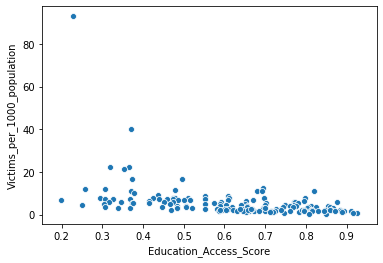

In [17]:
ax = sns.scatterplot(data=merged,
                x="Education_Access_Score",
                y="Victims_per_1000_population");


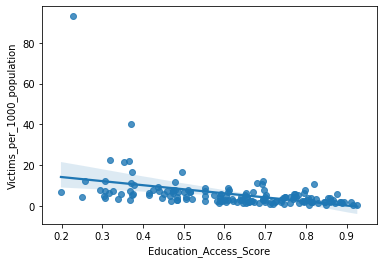

In [18]:
ax= sns.regplot(data=merged,
                x="Education_Access_Score",
                y="Victims_per_1000_population");


In [19]:
#x= merged["Education_Access_Score"]
#y= merged["Victims_per_1,000_population"]

#print("x mean:",x.mean().round(2),"y mean:", y.mean().round(2))

In [20]:
#mer = pd.DataFrame({"y":y, "x":x})
merged_new= merged[["Education_Access_Score", "Victims_per_1000_population"]].copy()
merged_new.dropna(inplace=True)
merged_new.head()

,Education_Access_Score,Victims_per_1000_population
0,0.227514,93.0
1,0.370089,40.0
2,0.317867,22.3
3,0.365333,22.2
4,0.352278,21.4


In [21]:
merged_new.corr()

,Education_Access_Score,Victims_per_1000_population
Education_Access_Score,1.000000,-0.416617
Victims_per_1000_population,-0.416617,1.000000


#  OLS Regression Results 

In [22]:

x = sm.add_constant(merged_new.Education_Access_Score)
model = sm.OLS(merged_new.Victims_per_1000_population,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     Victims_per_1000_population   R-squared:                       0.174
Model:                                     OLS   Adj. R-squared:                  0.168
Method:                          Least Squares   F-statistic:                     31.29
Date:                         Wed, 08 Jul 2020   Prob (F-statistic):           1.03e-07
Time:                                 14:06:40   Log-Likelihood:                -524.90
No. Observations:                          151   AIC:                             1054.
Df Residuals:                              149   BIC:                             1060.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------